# 1. Simulation Study of Bandit Algorithms

## 1a. Epsilon Greedy

In [1]:
import numpy as np

def egreedy(c, epsilon):
    arm1_rewards = []
    arm2_rewards = []
    for t in range(1, c*2 + 1):
        a_t = (t%2) + 1
        if a_t == 1:
            arm1_rewards.append(np.random.normal(0, 1))
        if a_t == 2:
            arm2_rewards.append(np.random.normal(1, 1))
    for t in range(c*2 + 1, 51):
        coin = np.random.binomial(1, epsilon)
        if coin == 1:
            a_t = np.random.choice([1,2])
            if a_t == 1:
                arm1_rewards.append(np.random.normal(0, 1))
            if a_t == 2:
                arm2_rewards.append(np.random.normal(1, 1))   
        else:
            if np.mean(arm1_rewards) > np.mean(arm2_rewards):
                arm1_rewards.append(np.random.normal(0, 1))
            elif np.mean(arm2_rewards) > np.mean(arm1_rewards):
                arm2_rewards.append(np.random.normal(1, 1))
    return arm1_rewards, arm2_rewards

eg_g = []
for b in range(200):
    x = egreedy(4, 0.5)
    eg_g.append(sum(x[0] + x[1]))
print("The expected value of the total reward for the epsilon greedy algorithm is: ", np.mean(eg_g))

The expected value of the total reward for the epsilon greedy algorithm is:  35.25039644441941


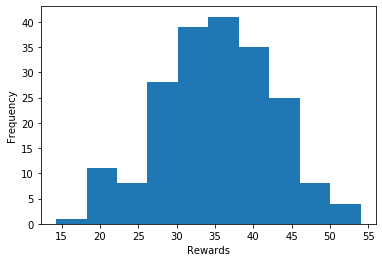

In [7]:
import matplotlib.pyplot as plt

plt.hist(eg_g, density = False, bins=10)  
plt.ylabel('Frequency')
plt.xlabel('Rewards');

## 1b. Explore then commit

In [3]:
def explore_then_commit(c):
    arm1_rewards = []
    arm2_rewards = []
    for t in range(1, c*2 + 1):
        a_t = (t%2) + 1
        if a_t == 1:
            arm1_rewards.append(np.random.normal(0, 1))
        if a_t == 2:
            arm2_rewards.append(np.random.normal(1, 1))
    highest_avg_reward_arm = 0
    if np.mean(arm1_rewards) > np.mean(arm2_rewards):
        highest_avg_reward_arm = 1
    elif np.mean(arm2_rewards) > np.mean(arm1_rewards):
        highest_avg_reward_arm = 2 
    for t in range(c*2 + 1, 51):
        if highest_avg_reward_arm == 1:
            arm1_rewards.append(np.random.normal(0, 1))
        elif highest_avg_reward_arm == 2:
            arm2_rewards.append(np.random.normal(1, 1))
    return arm1_rewards, arm2_rewards
ec_g = []
for b in range(200):
    x = explore_then_commit(4)
    ec_g.append(sum(x[0] + x[1]))
print("The expected value of the total reward for the explore then commit algorithm is: ", np.mean(ec_g))

The expected value of the total reward for the explore then commit algorithm is:  41.84990960790826


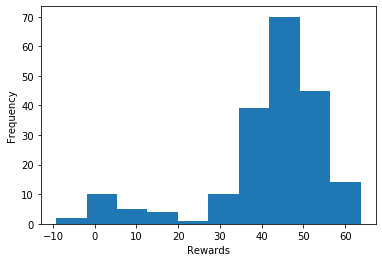

In [4]:
plt.hist(ec_g, density = False, bins=10)  
plt.ylabel('Frequency')
plt.xlabel('Rewards');

The average total reward for the explore then commit algorithm is higher than that of the epsilon greedy algorithm. The distribution of the epsilon greedy algorithm is more normal/guassian and also unimodal. The explore then commit distribution, on the other hand, seems to be bimodal and has two separate distributions with a gap between the two: one from 0-25 and another from 30-60.

## 1c. UCB

In [5]:
def UCB(c):
    arm1_rewards = []
    arm2_rewards = []
    for t in range(1, c*2 + 1):
        a_t = (t%2) + 1
        if a_t == 1:
            arm1_rewards.append(np.random.normal(0, 1))
        if a_t == 2:
            arm2_rewards.append(np.random.normal(1, 1))
    for t in range(c*2 + 1, 51):
        arm1_ci = np.mean(arm1_rewards) + np.sqrt((2*np.log(20))/len(arm1_rewards))
        arm2_ci = np.mean(arm2_rewards) + np.sqrt((2*np.log(20))/len(arm2_rewards))
        if arm1_ci > arm2_ci:
            arm1_rewards.append(np.random.normal(0, 1))
        elif arm2_ci > arm1_ci:
            arm2_rewards.append(np.random.normal(1, 1))
    return arm1_rewards, arm2_rewards

ucb_g = []
for b in range(200):
    x = UCB(4)
    ucb_g.append(sum(x[0] + x[1]))
print("The expected value of the total reward for the UCB algorithm is: ", np.mean(ucb_g))


The expected value of the total reward for the UCB algorithm is:  45.22700308755868


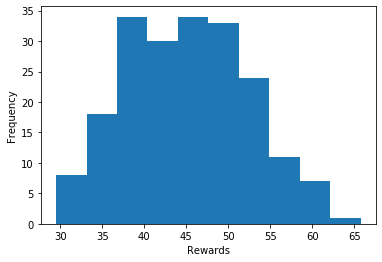

In [6]:
plt.hist(ucb_g, density = False, bins=10)  
plt.ylabel('Frequency')
plt.xlabel('Rewards');

The average of the UCB algorithm is higher than that of the explore than commit algorithm. The UCB algorithm is more normal/guassian, unimodal, and doesn't have a gap in its distribution. This is different from the explore then commit distribution, which did have a separation in its distribution and two modes.